## Global Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

## Reading In Dataset

In [2]:
quality = pd.read_csv("/home/vivek/Documents/personal_contents/mycodes/isro_workshop/quality.csv")

## Glimpse Of Data

In [5]:
quality.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


## Data Summary

In [6]:
quality.describe()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall,PoorCare
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,66.000000,2.717557,1.496183,13.229008,4.572519,480.567112,15.557252,17.442748,23.984733,43.244275,142.862595,2.694656,0.251908
std,37.960506,5.099434,2.167501,9.077076,9.713615,274.767240,20.418001,12.298318,13.670285,28.886540,91.629921,6.983379,0.435775
min,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000,11.000000,20.000000,0.000000,0.000000
25%,33.500000,0.000000,0.000000,7.000000,0.000000,206.958333,1.000000,8.000000,15.000000,25.500000,83.500000,0.000000,0.000000
50%,66.000000,0.000000,1.000000,12.000000,1.000000,640.958333,8.000000,15.000000,20.000000,37.000000,120.000000,1.000000,0.000000
75%,98.500000,3.000000,2.000000,18.500000,3.000000,731.000000,23.000000,22.500000,30.000000,49.500000,185.000000,3.000000,0.500000
max,131.000000,30.000000,11.000000,46.000000,59.000000,731.000000,104.000000,69.000000,82.000000,194.000000,577.000000,71.000000,1.000000


## Converting Categorical Column To Numeric

In [8]:
quality["StartedOnCombination"] = quality.StartedOnCombination.map({False:0,True:1})

## Correlation Between Variables

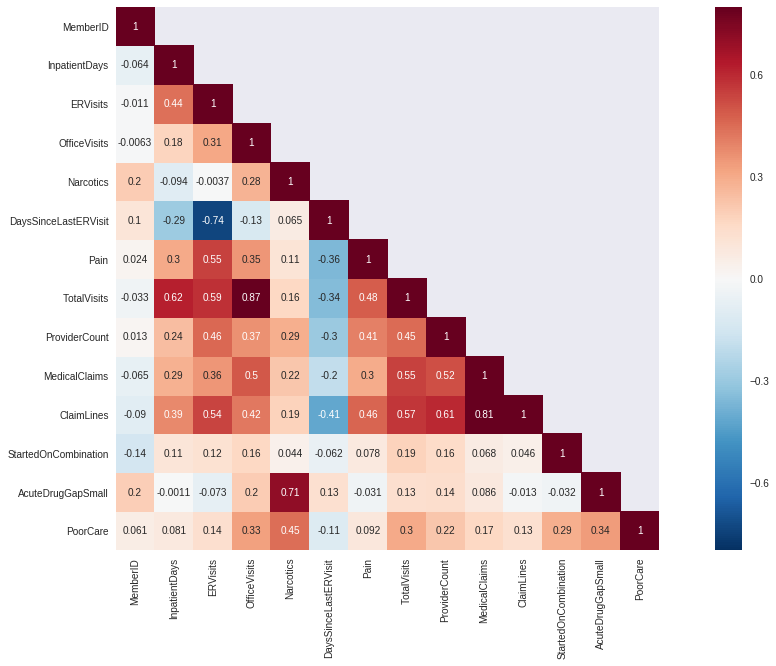

In [11]:
corrMatt = quality.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

## Visualizing Dependent Variable

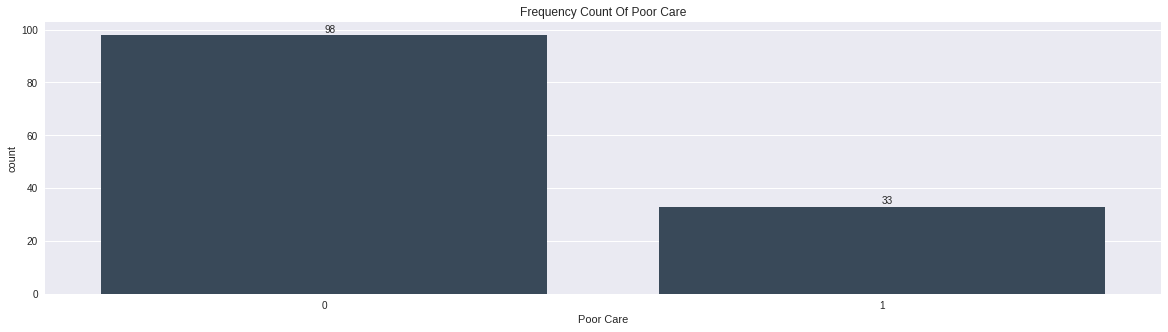

In [17]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(quality.PoorCare,ax=ax,color="#34495e",)
ax.set(xlabel="Poor Care",title="Frequency Count Of Poor Care")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

## Spliting Train And Test Dataset

In [21]:
from sklearn.model_selection import train_test_split
featureCols = ['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics','DaysSinceLastERVisit', 'Pain',\
        'TotalVisits', 'ProviderCount','MedicalClaims', 'ClaimLines', 'StartedOnCombination','AcuteDrugGapSmall']
train_X, test_X,train_y, test_y = train_test_split( quality[featureCols],\
                                    quality['PoorCare'],\
                                    test_size = 0.2,\
                                    random_state = 42 )

## Baseline Model

In [24]:
from sklearn import metrics
accuracy = metrics.accuracy_score( test_y, np.zeros(len(test_y)))
report = metrics.classification_report( test_y, np.zeros(len(test_y))  )
print ("Accuracy Of Baseline Model: ",accuracy)
print ("\nReport Of Baseline Model: \n",report)

Accuracy Of Baseline Model:  0.740740740741

Report Of Baseline Model: 
              precision    recall  f1-score   support

          0       0.74      1.00      0.85        20
          1       0.00      0.00      0.00         7

avg / total       0.55      0.74      0.63        27



/home/vivek/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


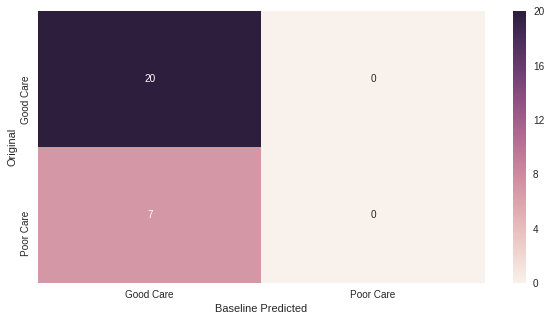

In [27]:
fig,ax = plt.subplots()
fig.set_size_inches(10,5)
confusion_matrix = metrics.confusion_matrix( test_y, np.zeros(len(test_y))  )
sn.heatmap(confusion_matrix, annot=True,  fmt='.0f',ax=ax ,xticklabels = ["Good Care","Poor Care"] , yticklabels = ["Good Care","Poor Care"] )
plt.ylabel('Original')
plt.xlabel('Baseline Predicted')

## Logistic Regression Model

In [30]:
#Initialize logistic regression model
from sklearn import linear_model
log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(X = train_X,y = train_y)

[-1.10262209]
[[ 0.03178823 -0.09912623  0.06909919  0.08593132 -0.00330074 -0.00492576
   0.0017612   0.03119975 -0.011062   -0.00404472  0.78575505  0.17946803]]


## Feature Importance

In [55]:
from sklearn import feature_selection
features = feature_selection.f_regression(X = train_X,y = train_y)
featureImportanceDf = pd.DataFrame({"features":train_X.columns,"beta_coef":log_model.coef_[0],"p_value":features[1]},columns=["features","beta_coef","p_value"])
sortedDf = featureImportanceDf.sort_values(["beta_coef"],ascending=False)
sortedDf.head(20)

,features,beta_coef,p_value
10,StartedOnCombination,0.785755,1.834156e-02
11,AcuteDrugGapSmall,0.179468,4.512526e-06
3,Narcotics,0.085931,6.984354e-07
2,OfficeVisits,0.069099,4.312162e-04
0,InpatientDays,0.031788,4.145389e-01
7,ProviderCount,0.031200,5.739875e-04
6,TotalVisits,0.001761,1.009165e-03
4,DaysSinceLastERVisit,-0.003301,1.136187e-01
9,ClaimLines,-0.004045,2.542457e-02
5,Pain,-0.004926,9.640756e-02


In [33]:
preds = log_model.predict(X= test_X)
accuracy = metrics.accuracy_score( list(test_y), preds )
report = metrics.classification_report( list(test_y), preds )
print ("Accuracy Of Logistic Regression: ",accuracy)
print ("\nReport Of Logistic Regression: \n",report)

Accuracy Of Logistic Regression:  0.851851851852

Report Of Logistic Regression: 
              precision    recall  f1-score   support

          0       0.83      1.00      0.91        20
          1       1.00      0.43      0.60         7

avg / total       0.88      0.85      0.83        27



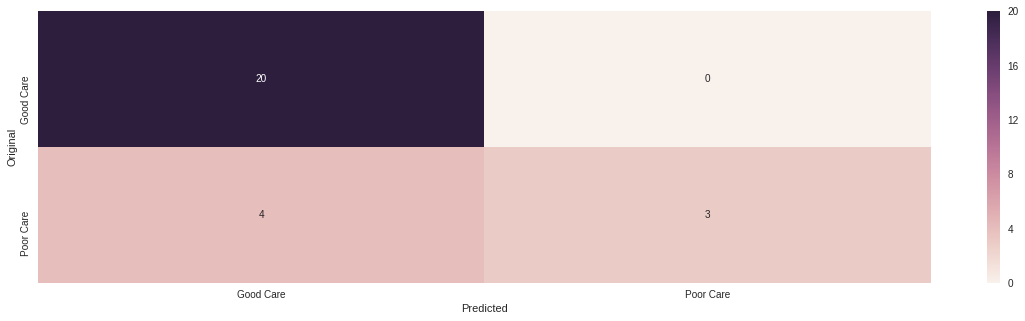

In [35]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
confusion_matrix = metrics.confusion_matrix( list(test_y), preds )
sn.heatmap(confusion_matrix, annot=True,  fmt='.0f',ax=ax ,xticklabels = ["Good Care","Poor Care"] , yticklabels = ["Good Care","Poor Care"] )
plt.ylabel('Original')
plt.xlabel('Predicted')